In [113]:
import numpy as np
import matplotlib.pyplot as plt
from nansat import Nansat, Domain, Mosaic
from boreali import Boreali

%matplotlib inline

Test img file name: A2014301181500.L2_LAC_OC.x.nc
Bathymetry file: michigan_lld.grd

In [107]:
n_img = Nansat('/home/artemm/Documents/PythonProjects/work/data/A2014301181500.L2_LAC_OC.x.nc')
bathymetry = Nansat('/home/artemm/Documents/PythonProjects/work/data/michigan_lld.grd')

dom = Domain('+proj=latlong +datum=WGS84 +ellps=WGS84 +no_defs', '-lle -86.3 44.6 -85.2 45.3 -ts 300 200')

n_img.reproject(dom)
bathymetry.reproject(dom)

=>michigan.grd<=


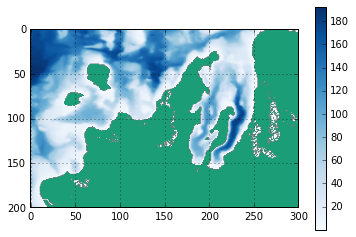

In [25]:
#bottom plotting
h = bathymetry[1]
h = np.where(h >= 0, np.nan, np.array(h) * -1)
h_mask = np.where(np.isfinite(h), np.nan, 1)
plt.imshow(h, cmap='Blues')
plt.colorbar()
plt.imshow(h_mask, cmap='Dark2')

plt.grid(color='black')

In [73]:
img = Nansat.write_figure(n_img, 'test.png', [10, 8, 2])

In [112]:
# boreali case

wavelen = [412, 443, 469, 488, 531, 547, 555, 645, 667, 678]

cpa_limits = [0.01, 2, 0.01, 1, 0.01, 1, 10]

b = Boreali('michigan', wavelen)
theta = np.zeros_like(n_img[2])

custom_n = Nansat(domain=n_img)
band_rrs_numbers = list(map(lambda x: n_img._get_band_number('Rrs_' + str(x)), wavelen)) 

for index in range(0, len(wavelen)):
    rrsw = n_img[band_rrs_numbers[index]] / (0.52 + 1.7 * n_img[band_rrs_numbers[index]])   
    custom_n.add_band(rrsw, parameters={'name': 'Rrsw_' + str(wavelen[index]),  
                                        'units': 'sr-1',
                                        'wavelength': wavelen[index]})

    custom_n.add_band(n_img[band_rrs_numbers[index]], parameters={'name': 'Rrs_' + str(wavelen[index]),
                                                                  'units': 'sr-1',
                                                                  'wavelength': wavelen[index]})
    
mask = np.where(n_img[2] != np.float(-0.015534), np.array(64.0), np.array(0.0))
custom_n.add_band(mask, parameters={'name' : 'mask'})

cpa = b.process(custom_n, cpa_limits,  mask=custom_n['mask'], depth=h, theta=theta, threads=4)

custom_n.add_band(array=cpa[0], parameters={'name': 'chl',
                                            'long_name': 'Chlorophyl-a',
                                            'units': 'mg m-3'})
custom_n.add_band(array=cpa[1], parameters={'name': 'tsm',
                                            'long_name': 'Total suspended matter',
                                            'units': 'g m-3'})
custom_n.add_band(array=cpa[2], parameters={'name': 'doc',
                                            'long_name': 'Dissolved organic carbon',
                                            'units': 'gC m-3'})
custom_n.add_band(array=cpa[3], parameters={'name': 'mse',
                                            'long_name': 'Root Mean Square Error',
                                            'units': 'sr-1'})
custom_n.add_band(array=cpa[4], parameters={'name': 'mask',
                                            'long_name': 'L2 Boreali mask',
                                            'units': '1'})
#   custom_n.export(final_path + obj.split('/')[-1] + 'cpa_OSW.nc')

wavelen [412.0, 443.0, 469.0, 488.0, 531.0, 547.0, 555.0, 645.0, 667.0, 678.0]
R Name is  Rrs_


(10, 200, 300)
Pixels x bands to process:  (21297, 10)


launch shallow


launch shallow


launch shallow


launch shallow


spent:  43.4162960052


    fig_params = {'legend': True,
                  'LEGEND_HEIGHT': 0.5,
                  'NAME_LOCATION_Y': 0,
                  'mask_array': cpa[4],
                  'mask_lut': {1: [255, 255, 255],
                               2: [128, 128, 128],
                               4: [200, 200, 255]}}
    custom_n.write_figure(final_path + obj.split('/')[-1] + 'chl_OSW.png', 'chl', clim=[0, 1.], **fig_params)
    custom_n.write_figure(final_path + obj.split('/')[-1] + 'tsm_OSW.png', 'tsm', clim=[0, 1.], **fig_params)
    custom_n.write_figure(final_path + obj.split('/')[-1] + 'doc_OSW.png', 'doc', clim=[0, .2], **fig_params)
    custom_n.write_figure(final_path + obj.split('/')[-1] + 'mse_OSW.png', 'mse', clim=[1e-5, 1e-2],
                          logarithm=True, **fig_params)
    n.write_figure(final_path + obj.split('/')[-1] + 'rgb_OSW.png',
                   [16, 14, 6],
                   clim=[[0, 0, 0], [0.006, 0.04, 0.024]],
                   mask_array=cpa[4],
                   mask_lut={2: [128, 128, 128]})